In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,6

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
rh_data = pd.read_csv('C://Users//User//Desktop//IOT BDA//colombo_rh_2012-2018.csv', parse_dates={'date':['year','month','day']})

In [5]:
rh_data.drop(['station_id','station_name'], axis=1, inplace=True)

In [6]:
rh_data.head()

,date,element_name,obs_val
0,2012 1 1,RHMAX,91.0
1,2012 1 2,RHMAX,90.0
2,2012 1 3,RHMAX,89.0
3,2012 1 4,RHMAX,89.0
4,2012 1 5,RHMAX,95.0


In [7]:
rh_data.tail()

,date,element_name,obs_val
4398,2018 12 27,RHMAX,90.0
4399,2018 12 28,RHMAX,88.0
4400,2018 12 29,RHMAX,76.0
4401,2018 12 30,RHMAX,81.0
4402,2018 12 31,RHMAX,82.0


In [8]:
rh_data.describe()

,obs_val
count,4383.000000
mean,82.619895
std,8.533591
min,46.000000
25%,77.000000
50%,84.000000
75%,89.000000
max,98.000000


In [9]:
rh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4403 entries, 0 to 4402
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          4403 non-null   object 
 1   element_name  4403 non-null   object 
 2   obs_val       4383 non-null   float64
dtypes: float64(1), object(2)
memory usage: 103.3+ KB


In [10]:
rh_data.isnull().value_counts()

date   element_name  obs_val
False  False         False      4383
                     True         20
dtype: int64

In [11]:
rh_data[rh_data.isnull().any(axis=1)]

,date,element_name,obs_val
60,2012 2 30,RHMAX,NaN
61,2012 2 31,RHMAX,NaN
123,2012 4 31,RHMAX,NaN
185,2012 6 31,RHMAX,NaN
278,2012 9 31,RHMAX,NaN
340,2012 11 31,RHMAX,NaN
431,2013 2 29,RHMAX,NaN
432,2013 2 30,RHMAX,NaN
433,2013 2 31,RHMAX,NaN
495,2013 4 31,RHMAX,NaN


In [12]:
rh_data.dropna(inplace=True)

In [13]:
rh_data['date']= pd.to_datetime(rh_data['date'], infer_datetime_format=True)

In [14]:
rh_data.head()

,date,element_name,obs_val
0,2012-01-01,RHMAX,91.0
1,2012-01-02,RHMAX,90.0
2,2012-01-03,RHMAX,89.0
3,2012-01-04,RHMAX,89.0
4,2012-01-05,RHMAX,95.0


In [15]:
rh_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4402
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          4383 non-null   datetime64[ns]
 1   element_name  4383 non-null   object        
 2   obs_val       4383 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 137.0+ KB


In [16]:
len(rh_data['date'].unique())

2557

In [17]:
sum(rh_data['element_name']=='RHMAX')

2922

In [18]:
sum(rh_data['element_name']=='RHMIN')

1461

In [19]:
len(rh_data[rh_data['element_name']=='RHMAX']['date'])

2922

In [20]:
max_rh =rh_data[rh_data['element_name']=='RHMAX']

In [21]:
max_rh[max_rh.duplicated()]

,date,element_name,obs_val
4038,2018-01-01,RHMAX,88.0
4039,2018-01-02,RHMAX,85.0
4040,2018-01-03,RHMAX,78.0
4041,2018-01-04,RHMAX,76.0
4042,2018-01-05,RHMAX,70.0
...,...,...,...
4398,2018-12-27,RHMAX,90.0
4399,2018-12-28,RHMAX,88.0
4400,2018-12-29,RHMAX,76.0
4401,2018-12-30,RHMAX,81.0


In [22]:
max_rh[max_rh['date']=='2018-12-28']

,date,element_name,obs_val
2938,2018-12-28,RHMAX,88.0
4399,2018-12-28,RHMAX,88.0


In [23]:
max_rh.sort_values(by='date')[2880:].head(10)

,date,element_name,obs_val
4382,2018-12-11,RHMAX,81.0
2921,2018-12-11,RHMAX,81.0
4383,2018-12-12,RHMAX,86.0
2922,2018-12-12,RHMAX,86.0
4384,2018-12-13,RHMAX,87.0
2923,2018-12-13,RHMAX,87.0
2924,2018-12-14,RHMAX,86.0
4385,2018-12-14,RHMAX,86.0
4386,2018-12-15,RHMAX,87.0
2925,2018-12-15,RHMAX,87.0


In [24]:
max_rh.drop_duplicates(subset=["date"], keep='first',inplace=True)

In [25]:
max_rh.drop(['element_name'],axis=1, inplace=True)

In [26]:
max_rh.head()

,date,obs_val
0,2012-01-01,91.0
1,2012-01-02,90.0
2,2012-01-03,89.0
3,2012-01-04,89.0
4,2012-01-05,95.0


In [27]:
max_rh=max_rh.set_index('date')

In [28]:
max_rh = max_rh.squeeze()

In [29]:
type(max_rh)

pandas.core.series.Series

In [30]:
max_rh

date
2012-01-01    91.0
2012-01-02    90.0
2012-01-03    89.0
2012-01-04    89.0
2012-01-05    95.0
              ... 
2018-12-27    90.0
2018-12-28    88.0
2018-12-29    76.0
2018-12-30    81.0
2018-12-31    82.0
Name: obs_val, Length: 2557, dtype: float64

In [31]:
max_rh.describe()

count    2557.000000
mean       86.831834
std         5.704091
min        63.000000
25%        83.000000
50%        86.000000
75%        91.000000
max        98.000000
Name: obs_val, dtype: float64

# is series statiostationery?

<AxesSubplot:xlabel='date'>

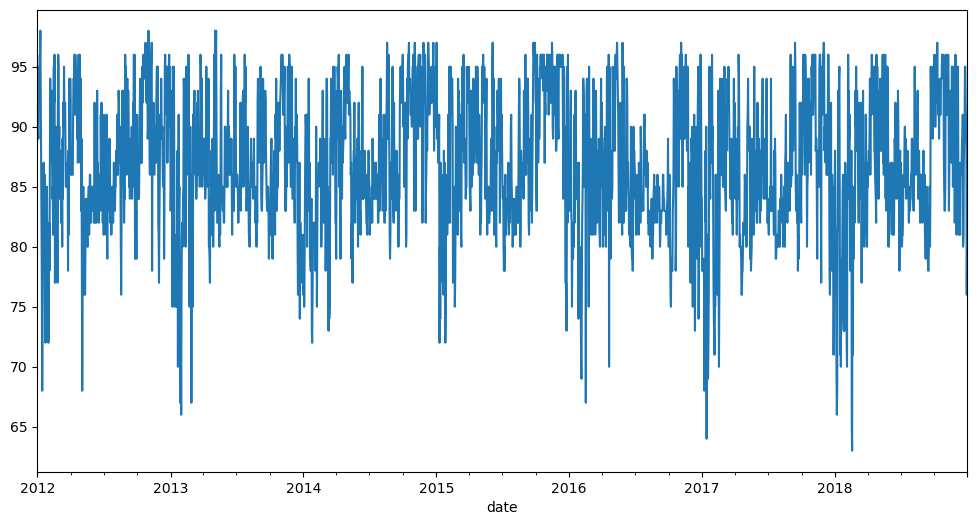

In [32]:
max_rh.plot()

In [33]:
import statsmodels.api as sm

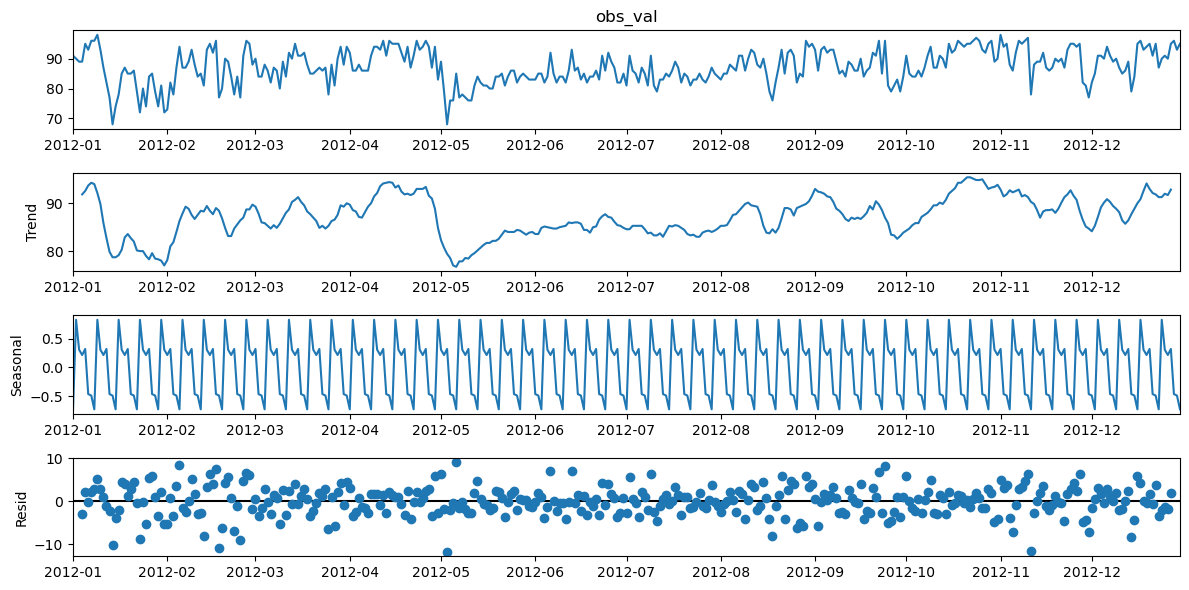

In [34]:
decomposition = sm.tsa.seasonal_decompose(max_rh.head(365), model= 'additive')
fig = decomposition.plot()
plt.show()

<AxesSubplot:>

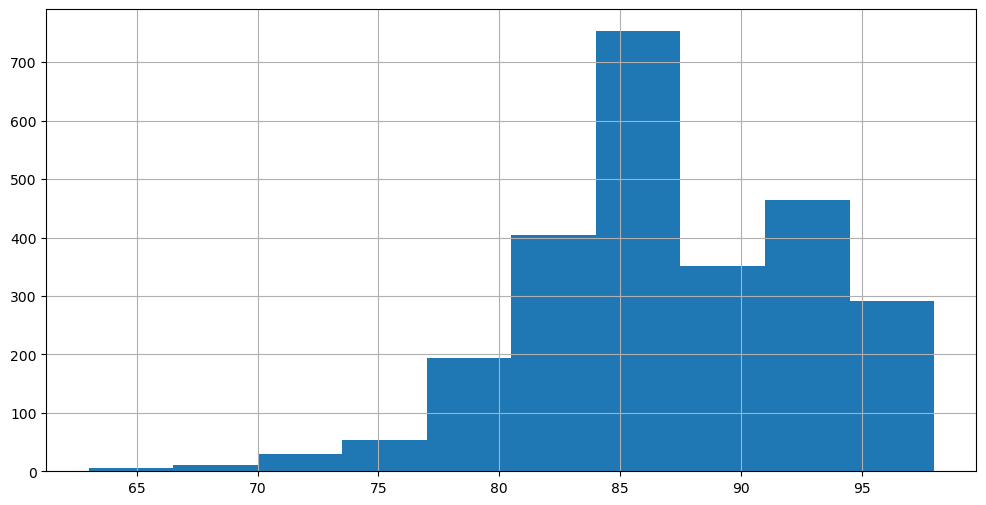

In [35]:
max_rh.hist()

In [36]:
max_rh_1 = max_rh[0:int(len(max_rh)/2)]

In [37]:
max_rh_2 = max_rh[int(len(max_rh)/2):]

In [38]:
print('mean 1 - ', max_rh_1.mean())
print('mean 2 - ', max_rh_2.mean())
print('var 1 - ', max_rh_1.var())
print('var 1 - ', max_rh_2.var())

mean 1 -  87.13928012519561
mean 2 -  86.52462861610633
var 1 -  30.19984975545438
var 1 -  34.70811752628537


# Rolling Stat

In [39]:
max_rh_moving_avg = max_rh.rolling(window=365).mean()
max_rh_moving_std = max_rh.rolling(window=365).std()

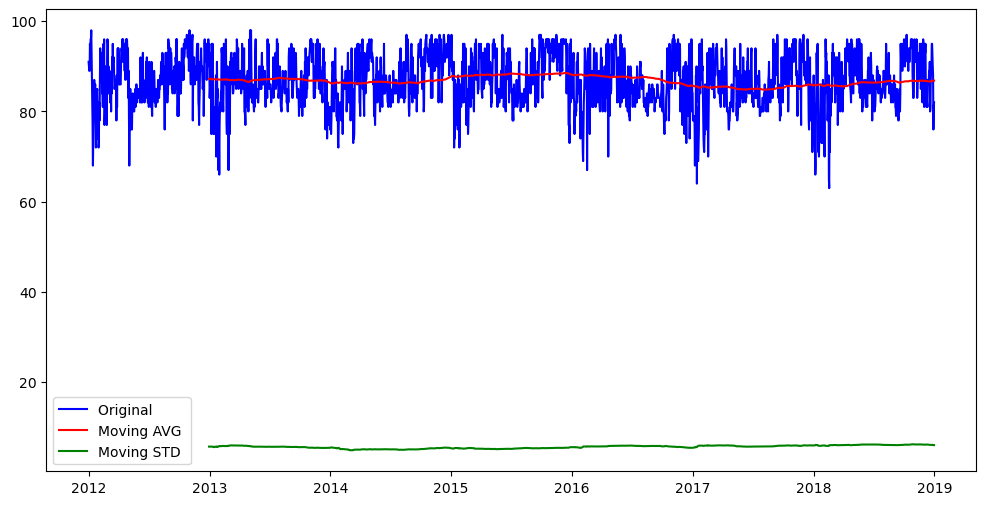

In [40]:
plt.plot(max_rh, color='b', label= 'Original ')
plt.plot(max_rh_moving_avg, color='r', label= 'Moving AVG ')
plt.plot(max_rh_moving_std, color='g', label= 'Moving STD')
plt.legend()
plt.show(block=False)

# ADCF test

In [41]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(max_rh)

print('AD_fuller statistic :- ', adf_test[0])
print('P Value :- ', adf_test[1])

AD_fuller statistic :-  -7.951975596559465
P Value :-  3.108452611513987e-12


# acf & pacf

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Original series

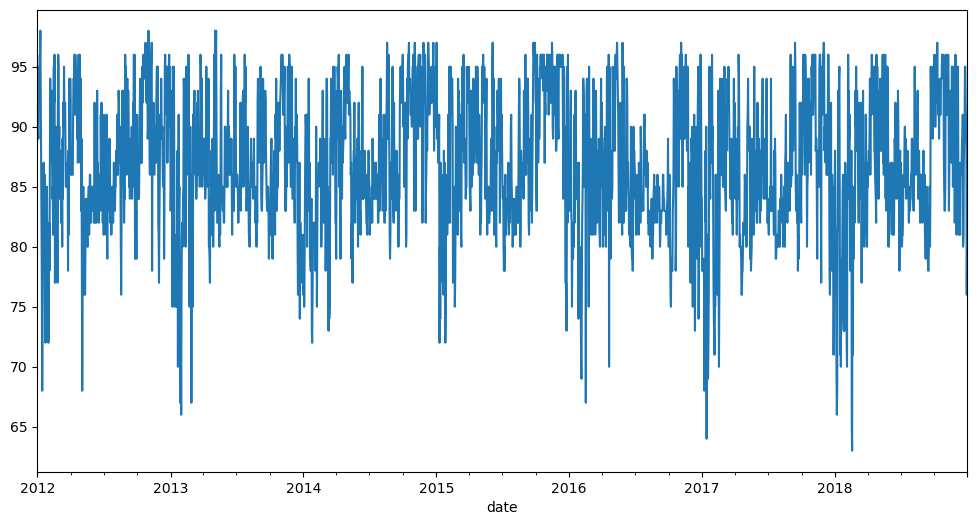

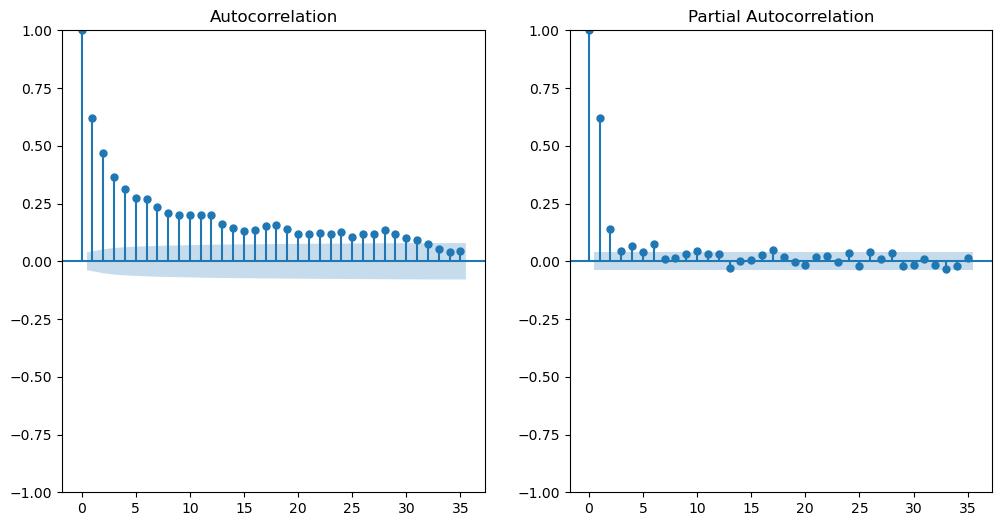

In [43]:
max_rh.plot()

fig, axes= plt.subplots(1,2)

plot_acf(max_rh,ax= axes[0])
plot_pacf(max_rh, ax= axes[1])
plt.show()

one time differenciated series

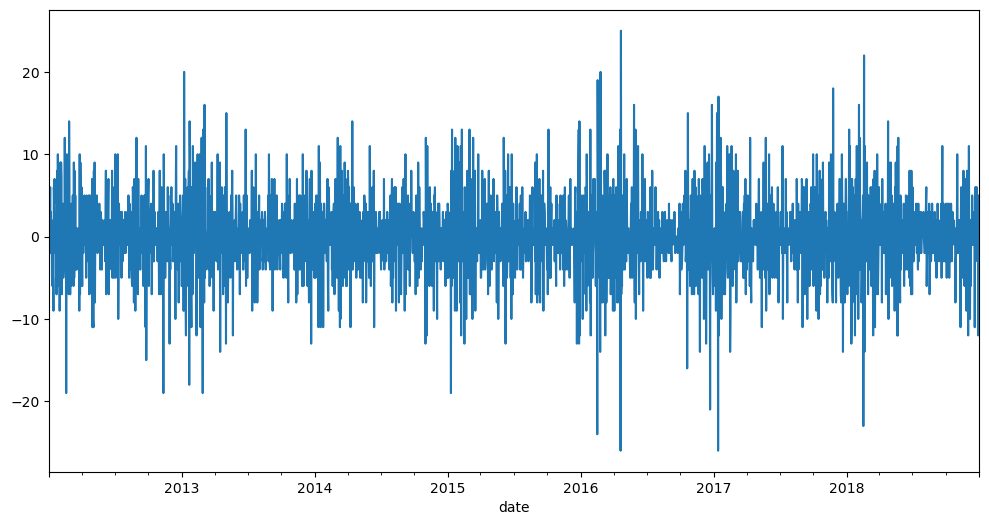

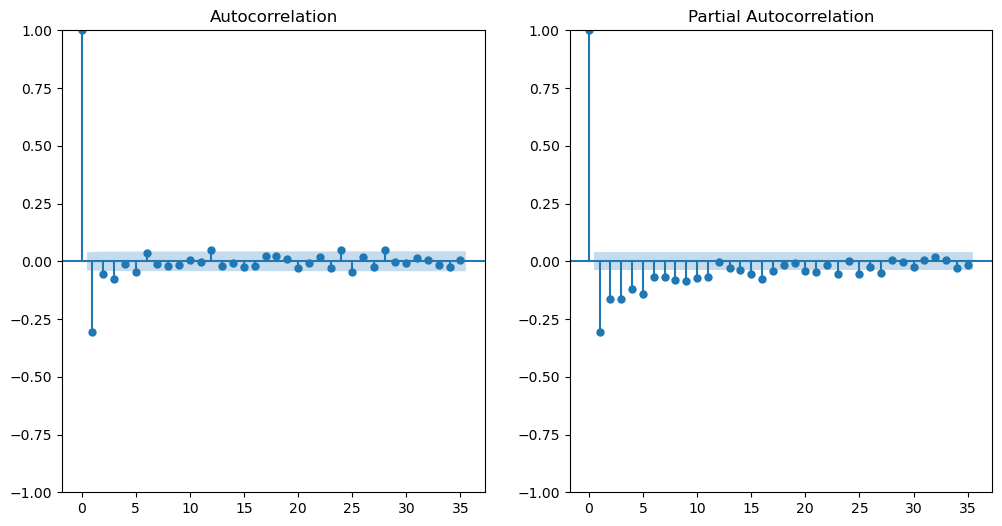

In [44]:
max_rh.diff().dropna().plot()

fig, axes= plt.subplots(1,2)

plot_acf(max_rh.diff().dropna(),ax= axes[0])
plot_pacf(max_rh.diff().dropna(), ax= axes[1])
plt.show()

In [45]:
## split data set 

len(max_rh), 6*365

(2557, 2190)

In [46]:
train = max_rh[:2190]
test =max_rh[2190:]

# Build ARIMA model

In [47]:
from statsmodels.tsa.arima.model import ARIMA

In [48]:
model = ARIMA(train, order=(5,0,30)).fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [49]:
model.aic

12707.833891499049

In [50]:
pred = model.predict(start= len(train), end= (len(max_rh)-1))

In [51]:
pred.head()

2017-12-30    80.101578
2017-12-31    83.065009
2018-01-01    83.430839
2018-01-02    83.457518
2018-01-03    82.832663
Freq: D, Name: predicted_mean, dtype: float64

In [52]:
test.head()

date
2017-12-30    82.0
2017-12-31    85.0
2018-01-01    88.0
2018-01-02    85.0
2018-01-03    78.0
Name: obs_val, dtype: float64

In [53]:
#check mse 

from sklearn.metrics import mean_squared_error
import numpy as np

In [54]:
error = np.sqrt(mean_squared_error(test,pred))
error

5.8212014650980235

In [55]:
test.mean(), np.sqrt(test.var())

(86.82288828337875, 6.010348029715493)

<AxesSubplot:xlabel='date'>

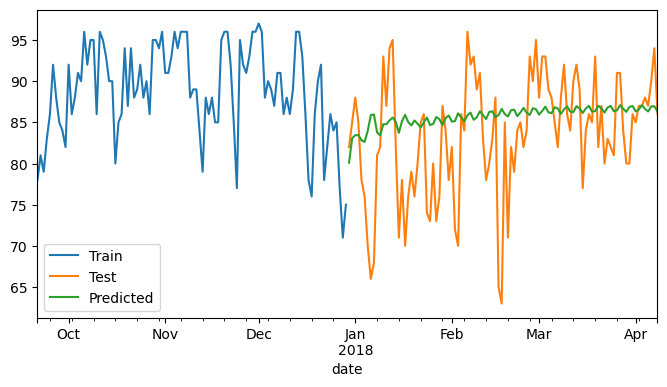

In [56]:
train.tail(100).plot(legend=True, label='Train', figsize=(8,4))
test.head(100).plot(legend=True, label='Test')
pred.head(100).plot(legend=True, label='Predicted')

# Hyperparameter 

In [57]:
import itertools

In [101]:
p = range(9,12)
q = range(25,31)
d =range(0,2)

In [102]:
pdq_ = list(itertools.product(p,d,q))

In [93]:
rmse_=[]
order_ =[]

In [104]:
import warnings
warnings.filterwarnings('ignore')


for pdq in pdq_:
    try:
        model_ = ARIMA(train , order= pdq).fit()
        pred_ = model_.predict(start= len(train), end= (len(max_rh)-1))
        error_ = np.sqrt(mean_squared_error(test, pred_))
        order_.append(pdq)
        rmse_.append(error_)
        
    except:
        continue

In [107]:
result = pd.DataFrame(index= order_, data=rmse_, columns=['RMSE'])

In [108]:
result.sort_values(by=['RMSE'])

,RMSE
"(9, 0, 26)",5.686446
"(9, 0, 26)",5.686446
"(9, 0, 27)",5.768328
"(9, 0, 27)",5.768328
"(11, 0, 27)",5.786060
...,...
"(11, 1, 25)",5.934652
"(11, 1, 26)",5.936718
"(11, 1, 26)",5.936718
"(9, 1, 26)",5.938440


# Predict next 12 month rh value

In [97]:
final_model = ARIMA(max_rh, order=(9,0,26)).fit()

In [98]:
next_12_month_prediction = final_model.forecast(steps=365)

In [99]:
next_12_month_prediction

2019-01-01    83.266342
2019-01-02    84.483590
2019-01-03    85.524611
2019-01-04    85.719842
2019-01-05    85.836288
                ...    
2019-12-27    86.842979
2019-12-28    86.842979
2019-12-29    86.842979
2019-12-30    86.842979
2019-12-31    86.842979
Freq: D, Name: predicted_mean, Length: 365, dtype: float64

<AxesSubplot:xlabel='date'>

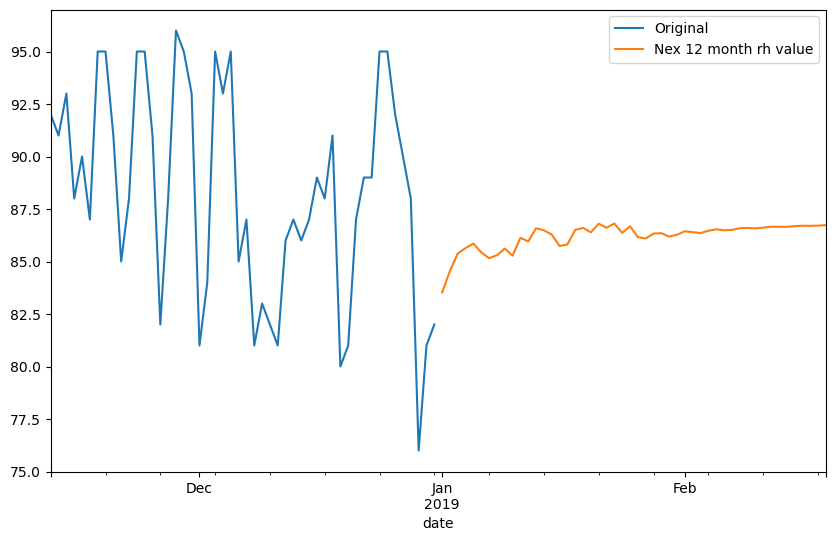

In [80]:
max_rh.tail(50).plot(legend=True, label='Original', figsize=(10,6))
next_12_month_prediction.head(50).plot(legend=True, label='Nex 12 month rh value')

In [81]:
type(next_12_month_prediction)

pandas.core.series.Series

In [83]:
next_12_month_prediction_data =next_12_month_prediction.to_frame()

In [85]:
next_12_month_prediction_data.to_csv('next_12_month_prediction.csv', index=False)